# Modelado y simulación de Atractor de Lorenz #
---

## Objetivos

* objetivo general:

Describir el comportamiento del atractor extraño de Lorenz y ejemplificar sus propiedades medeinte la predicción atmosférica. 

* Objetivos especificos:

Mediente la Teoría del caos (definición matematica) ejemplificar el comportamiento de los atractores extraños, en especifico el comportamiento del atractor de Lorenz. Para ello partimos de una explicación de un atractor, los tipos que existen y su definición matemática. Dando como resultado la resolucion de un modelo matemático para la predición de la dinamica de una atmosfera. 

## Modelo del problema
---

#### Teoría del caos

La teoria del caos trata a los sistemas no lineales que son sensibles a variaciones en condiciones iniciales. Estas variaciones pueden afectar de una manera significativa el sistema. 

En resumen, esta teoría significa que el resultado de un evento depende directamente de las variables que lo lleguen a afectar.

#### Atractor 

Es un modelo que oscila de forma irregular. Esto lo hace en solo una región, convergiendo hacia un conjunto conocido como un atractor extraño. Existen condicones que afectan a las atmosferas que viajan con respecto a este atractor. Estas condiciones afectan más a las atmosferas que sus puntos iniciales. 

Aunque el termino "Atractor" es complicado de definir de una manera rigurosa, puede caracterizarse de manera informal como **conjunto a lo que todas las trayectorias vecinas convergen**

Otra forma más precisa se puede definir como un **conjunto cerrado** el cual **cumple las siguientes caracteristicas:**

 1. Es **invariante frente a la dinámica del sistema**. Es decir, cualquier trayectoria que comience en el atractor, permanece en él indefinidamente. 

 2. **Atrae a un conjunto abierto de condiciones iniciales** suficientemente cercanas a él. Al conjunto más grande de tales condiciones se le denomina cuenca de atracción. 

 3. **Es mínimo**. Es decir, ningún subconjunto de él puede satisfacer las propiedades anteriores. 

#### Tipos de Atractores

Los distintos tipos de atractores que pueden aparecer en un sistema dinámico son: 
 1. Punto Fijo 
 2. Ciclo Limite o Orbita Limite
 3. Toro
 4. Atractor Extraño 

Por cuestiones practicas hablaremos solamente de los atractores extraños, ya que es de esta última la categoria a la cual el atractor de Lorenz peretenece. 

#### Atractor de Lorenz

La dinamica atmosferica presenta una complejidad matemática para su predicción. 

Para ello Lorenz se propuso simplificar dentro de lo posible las ecuaciones que terminan la dinámica atmosférica de forma que se pudiera determinar las condiciones mínimas para obtener los comportamientos de esta dinámica.​

Para lograr tal hazaña, Lorenz simplificó el modelo de atmosfera al máximo centrándose en el concepto de convección por temperatura

El modelo propuesto por Lorenz se puede explicar de la siguiente forma. Consideró la atmosfera como un fluido, especificamente un gas, entre dos superficies. La superficie inferior posee temperaturas altas, miestras que la temperatura superior, frias. Esto genera un perfil de temperaturas en la atmósfera desde las temperaturas altas, la capa de la atmosfera en contacto con la superficie inferior, hasta las temperaturas bajas, la capa de atmosfera en contacto con la capa superior. 

<img style="center" src="https://cuentoscuanticos.files.wordpress.com/2016/10/m1u7-fig7-16-convectioncurrents.gif?w=500" width="300px" height="100px" />

Con ello redujo toda la información a tres variables:

 1. x - intensidad del movimento convectivo
 2. y - diferencia de temperatura horizontal en una celda de convección 
 3. z - lo que se aleja de la linealidad del perfil vertical de temperaturas. 

Con esto en mente, Lorenz extrajo u sistema de ecuaciones simples

<img style="center" src="https://cuentoscuanticos.files.wordpress.com/2016/10/lorenzeq.gif?w=500" width="200px" height="100px" />

Para lograr esto, Lorens partió de un modelo previo con doce variables y lo simplifico hasta llegar a las conocidas ecuaciones de Lorenz. 

---

Los puntos de equilibrio, órbitas etables y ciclos limites son atractores. Eso representa que si uno es perturbado, el sistema que se comporta tal y como dictan esas situaciones, para posteriomente ser llevados a su punto de convergica según corresponda en cada caso. 

Con lorenz, si dibujamos un diagrama del comportamiento de las variables $x,y,z$ veremos lo siguiente: 

<img style="center" src="https://upload.wikimedia.org/wikipedia/commons/1/13/A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif" width="200px" height="100px" />


Con ello descubrimos que las condiciones iniciales para $x,y,z$ son indiferentes, puesto que el resultado es le mismo y constante, formando la caracteristica forma de alas de mariposa. 


In [7]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [8]:
# Definimos el sistema de ecuaciones
def f(xyz, t, sigma, rho, beta):
    x, y, z = xyz
    return [sigma * (y - x), 
           x * (rho - z) - y,
           x * y - beta * z]

# Asignamos valores a los parámetros
sigma, rho, beta = 8, 28, 8/3.0

# Condición inicial y valores de t sobre los que calcular
xyz0 = [1.0, 1.0, 1.0]
t = np.linspace(0, 25, 10000)

# Resolvemos las ecuaciones
xyz1 = integrate.odeint(f, xyz0, t, args=(sigma, rho, beta))
xyz2 = integrate.odeint(f, xyz0, t, args=(sigma, rho, 0.6*beta))
xyz3 = integrate.odeint(f, xyz0, t, args=(2*sigma, rho, 0.6*beta))

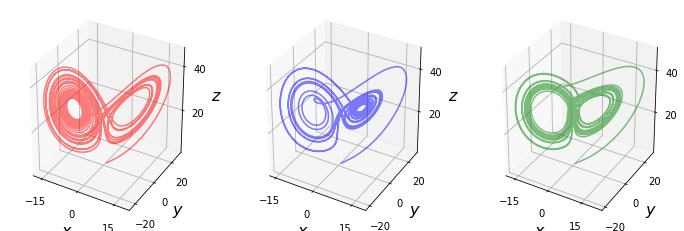

In [9]:
# Graficamos las soluciones
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12, 4),
                                  subplot_kw={'projection':'3d'})

for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])

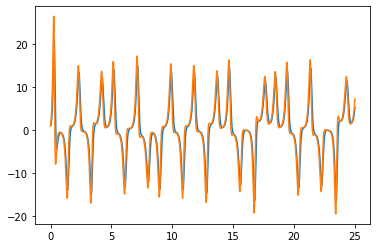

In [22]:
plt.plot(t,xyz[:,0])
plt.plot(t,xyz[:,1])

<img style="center" src="https://cuentoscuanticos.files.wordpress.com/2016/10/divergencex.png?w=500&h=191" width="600px" height="500px" />

### Método Runge-Kutta de orden 4 (RK4).

Este es uno de los métodos con soluciones para ecuaciones diferenciales con mejor aproximación. Consiste en la determinación de constantes para obtener los valores de la variable dependiente sujetos a valores específicos de la variable independiente.

Para encontrar la solución en un punto dado, se utiliza la siguiente fórmula:

$$
y_{i+1}=y_i+ \frac {1}{6} (k_1+2k_2+2k_3+k_4)
$$

Donde las constantes k son:

$$
k_1=hf(x_i,y_i)
$$

$$
k_2=hf(x_i+\frac{1}{2}h, y_i+\frac{1}{2}k_1)
$$

$$
k_3=hf(x_i+\frac{1}{2}h, y_i+\frac{1}{2}k_2)
$$

$$
k_4=hf(x_i+h, y_i+k_3)
$$

Este procedimiento se repite para cada iteración, por lo que el número de veces que se realiza depende de nuestro intervalo y tamaño de paso.

Para poder aplicar estas fórmulas y procedimiento a nuestro proyecto, se tienen que hacer una serie de adaptaciones.

Primero, se hace un cambio de variable donde $x$, $y$, $z$ son ahora $x_1$, $x_2$, $x_3$ respectivamente. Posteriormente se convierten las ecuaciones diferenciales y condiciones iniciales a vectores.

$x_0=\left[\begin{array} &x_0\\y_0\\z_0\end{array}\right]=\left[\begin{array} &3\\0\\0\end{array}\right]$

$f(t_i,x_i)=\left[\begin{array} &a(y-x)\\x(b-z)-y\\xy-cz\end{array}\right]=\left[\begin{array} &a(x_2-x_1)\\x_1(b-x_3)-x_2\\x_1x_2-cx_3\end{array}\right]$

Como se puede observar, nuestras ecuaciones tienen una dependencia explícita de $x$, por lo que al calcular las constantes $k$, se omite esta $t$.

Después, sustituimos en nuestra fórmula:

$$
k_1=hf(t_i,x_i)=h\left[\begin{array} &a(x_2-x_1)\\x_1(b-x_3)-x_2\\x_1x_2-cx_3\end{array}\right]
$$

Para $k_2$, $k_3$ y $k_4$ se tiene que calcular primero los argumentos, por lo que se realiza su operación interna primero:

$$
t_i+\frac{1}{2}h, x_i+\frac{1}{2}k_1
$$

Como se mencionó, se omite el cálculo de la $t$ ya que no está explícita en nuestras ecuaciones, por lo que únicamente se calcula $x_i+\frac{1}{2}k_1$, $x_i+\frac{1}{2}k_2$ y $x_i+k_3$ para $k_2$, $k_3$ y $k_4$ respectivamente. Esta operación es una suma matricial.

Una vez calculado esto, se evalua la función en estos puntos y se multiplica por el tamaño de paso $h$, como se hizo para el cálculo de $k_1$.

Ya que se calculan las constantes, se sustituyen en nuestra fórmula:

$$
x_{i+1}=x_i+ \frac {1}{6} (k_1+2k_2+2k_3+k_4)
$$

Este proceso se tiene que repetir para cada una de nuestras iteraciones, por lo que es conveniente utilizar python para realizarlo mediante un ciclo __"for"__.

### Ejemplo de la iteración $i=0$

#### $k_1$

$k_1=hf(t_0,x_0)=0.01\left[\begin{array} &10(0-3)\\3(28-0)-0\\(3)(0)-\frac {8}{3}(0)\end{array}\right] = \left[\begin{array}   --0.3\\0.84\\0\end{array}\right]$

#### $k_2$

$x_0+\frac{1}{2}k_1=\left[\begin{array} &3\\0\\0\end{array}\right]+\frac{1}{2}\left[\begin{array}   --0.3\\0.84\\0\end{array}\right]= \left[\begin{array}   &2.85\\0.42\\0\end{array}\right]$

$k_2=hf(x_0+\frac{1}{2}h,x_0+\frac{1}{2}k_1)=0.01\left[\begin{array} &10(0.42-2.85)\\2.85(28-0)-0.42\\(2.85)(0.42)-\frac {8}{3}(0)\end{array}\right] = \left[\begin{array}--0.243\\0.794\\0.012\end{array}\right]$

#### $k_3$

$x_0+\frac{1}{2}k_2=\left[\begin{array} &3\\0\\0\end{array}\right]+\frac{1}{2}\left[\begin{array}   --0.243\\0.794\\0.012\end{array}\right]= \left[\begin{array}   &2.879\\0.397\\0.006\end{array}\right]$

$k_3=hf(t_0+\frac{1}{2}h, x_0+\frac{1}{2}k_2)=0.01\left[\begin{array} &10(0.397-2.879)\\2.879(28-0.006)-0.397\\(2.879)(0.397)-\frac {8}{3}(0.006)\end{array}\right] = \left[\begin{array}--0.248\\0.802\\0.011\end{array}\right]$

#### $k_4$

$x_0+k_3=\left[\begin{array} &3\\0\\0\end{array}\right]+\left[\begin{array}   --0.248\\0.802\\0.011\end{array}\right]= \left[\begin{array}   &2.752\\0.802\\0.011\end{array}\right]$

$k_4=hf(t_i+h, x_i+k_3)=0.01\left[\begin{array} &10(0.802-2.752)\\2.752(28-0.011)-0.802\\(2.752)(0.0.802)-\frac {8}{3}(0.011)\end{array}\right] = \left[\begin{array}--0.195\\0.762\\0.022\end{array}\right]$

#### $x_1$

$x_1=x_0+ \frac {1}{6} (k_1+2k_2+2k_3+k_4)$

$x_1=\left[\begin{array} &3\\0\\0\end{array}\right]+\frac{1}{6}\left(\left[\begin{array}   --0.3\\0.84\\0\end{array}\right]+2\left[\begin{array}--0.243\\0.794\\0.012\end{array}\right]+2\left[\begin{array}--0.248\\0.802\\0.011\end{array}\right]+\left[\begin{array}--0.195\\0.762\\0.022\end{array}\right]\right)=\left[\begin{array} &2.754\\0.794\\0.011\end{array}\right]$

<IPython.core.display.Javascript object>


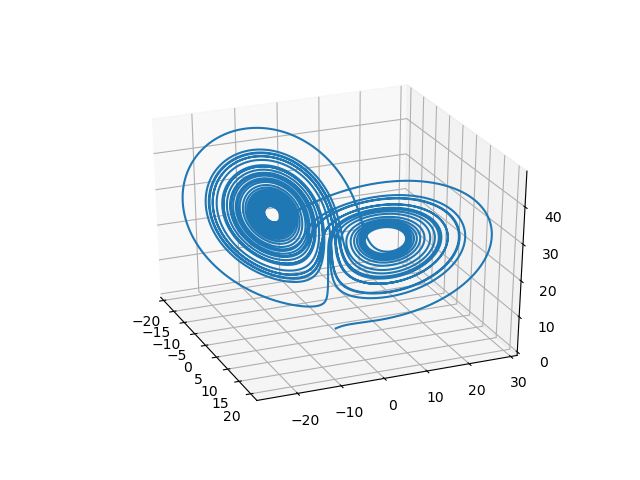

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

def f(t,x):
    a=10.0
    b=28.0
    c=8/3
    return np.array([a*(x[1]-x[0]),x[0]*(b-x[2])-x[1],x[0]*x[1]-c*x[2]])

t0=0
x0=np.array([3,0,0])

tn=40
h=0.001

n=round((tn-t0)/h)
t=np.linspace(t0,tn,n+1)
x=np.zeros((n+1,len(x0)))
x[0,:]=x0

for i in range(n):
    k1=h*f(t[i],x[i,:])
    k2=h*f(t[i]+h/2,x[i,:]+k1/2)
    k3=h*f(t[i]+h/2,x[i,:]+k2/2)
    k4=h*f(t[i]+h,x[i,:]+k3)
    x[i+1,:]=x[i,:]+(1/6)*(k1+2*k2+2*k3+k4)

fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot3D(x[:,0],x[:,1],x[:,2])
plt.show()

* 14 Atractor de Lorenz con RK4 (Ejemplo). (2020, 22 mayo). [Vídeo]. YouTube. https://www.youtube.com/watch?v=lpOOlffkHyU

* Bruder, J. (1993). Linearly-implicit Runge-Kutta methods based on implicit Runge-Kutta methods. Applied Numerical Mathematics, 13(1-3), 33-40. https://doi.org/10.1016/0168-9274(93)90129-f

* Cuánticos, C. (2016, 3 octubre). El atractivo de Lorenz. Cuentos Cuánticos. https://cuentos-cuanticos.com/2016/10/03/el-atractivo-de-lorenz/

* MOOC Caos 4.1: ¿Qué es un Atractor? (2018, 7 mayo). [Vídeo]. YouTube. https://www.youtube.com/watch?v=J6q_2_DdYfI

### Conclusiones
---

El atractor de Lorenz resultar ser un modelo matemátematico que ejemplifica el concepto de caos. Por un aprte resume el comportamiento de la dinamica atmosferica y predice posibilidades que nos ayudan a entender el dinanismo que esta posee atraves de sus condiciones y parametros. 

Por otra parte, los atractores resultan ser modelos matematicos que definen el comportamiento dinamico y mecanico de las particulas en un espacio, donde sin importar las condiciones, resutan en el mismo estado que los caracterizan. 